In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 300.2 kB/s eta 0:00:00 kB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 523.6 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.1 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 570.0 kB/s eta 0:00:001m43.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 6.2 MB/s eta 0:00:000m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.4 MB/s eta 0:00:000m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.3 MB/s eta 0:00:000m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 4.1 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.9 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 631.5 kB/s eta 0:00:001m48.0 MB/s eta 0:00:01
   ━━━━━━━━━

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

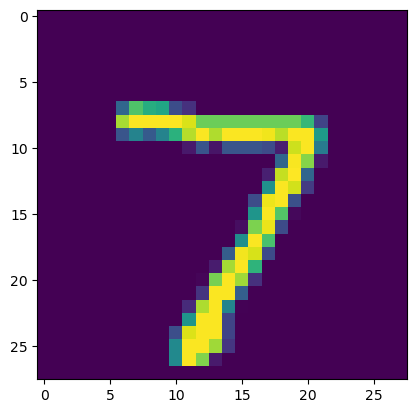

In [12]:
plt.imshow(tf.squeeze(X_test[0]))

In [13]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [14]:
type(X_train)

numpy.ndarray

In [15]:
print(X_train.shape)

(60000, 28, 28)


In [16]:
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [17]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
a = 0.45 # the factor of random noise that we want to add to the image
X_train_noised = X_train + tf.random.normal(shape=X_train.shape) * a
X_test_noised = X_test + tf.random.normal(shape=X_test.shape) * a

2024-08-09 11:13:51.652005: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-09 11:13:51.977450: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-09 11:13:52.265927: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-09 11:13:52.788727: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-08-09 11:13:53.195894: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [19]:
X_train_noised = tf.clip_by_value(X_train_noised, clip_value_min=0., clip_value_max=1.) 
X_test_noised = tf.clip_by_value(X_test_noised, clip_value_min=0., clip_value_max=1.)

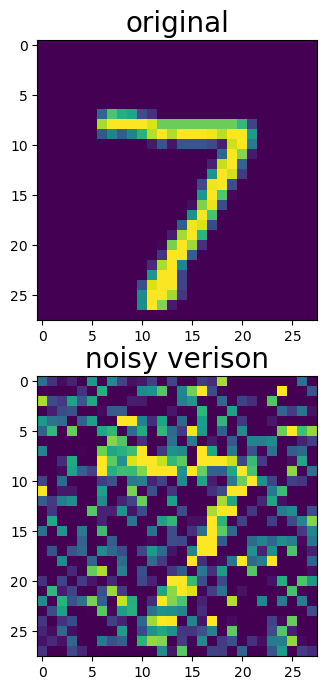

In [20]:
plt.figure(figsize=(20, 8))
ax = plt.subplot(2, 1, 1) 
plt.title("original", size=20) 
plt.imshow(tf.squeeze(X_test[0])) # here we will have to use tf.squeeze since we need to squeeze 28*28*1 to 28*28 
bx = plt.subplot(2, 1, 2) 
plt.title("noisy verison", size=20) 
plt.imshow(tf.squeeze(X_test_noised[0])) 
plt.show()

MODEL ARCHITECTURE

In [25]:
class Autoencoder(tf.keras.Model): 
  def __init__(self):

    super(Autoencoder, self).__init__() 

    self.encoder = tf.keras.Sequential()
    self.encoder.add(Input(shape=(28, 28, 1)))
    self.encoder.add(Conv2D(8, (3,3), activation='relu', padding='same', strides=2)) 
    self.encoder.add(Conv2D(4, (3,3), activation='relu', padding='same', strides=2)) 
    
    self.decoder = tf.keras.Sequential()
    self.decoder.add(Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'))
    self.decoder.add(Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')) 
    self.decoder.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))
    
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [26]:
model = Autoencoder()

In [27]:
input_shape = (28,28,1)
model.build(input_shape)

/home/dsai/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'autoencoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [28]:
model.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 7, 7, 4)        │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372 (1.45 KB)

 Trainable params: 372 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='mse')

EARLY STOPPING

In [30]:
callback= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3, verbose=2, mode="auto", restore_best_weights=True)
# patience counts number of epochs with no developement and then stops the epochs

In [31]:
model.fit(X_train_noised, X_train, epochs=8, shuffle=True, validation_data=(X_test_noised, X_test), callbacks = [callback])

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - loss: 0.0525 - val_loss: 0.0136
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.0137 - val_loss: 0.0130
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0132 - val_loss: 0.0126
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.0127 - val_loss: 0.0122
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - loss: 0.0119 - val_loss: 0.0116
Restoring model weights from the end of the best epoch: 8.


In [32]:
encoded_image=model.encoder(X_test).numpy()
decoded_image=model.decoder(encoded_image)

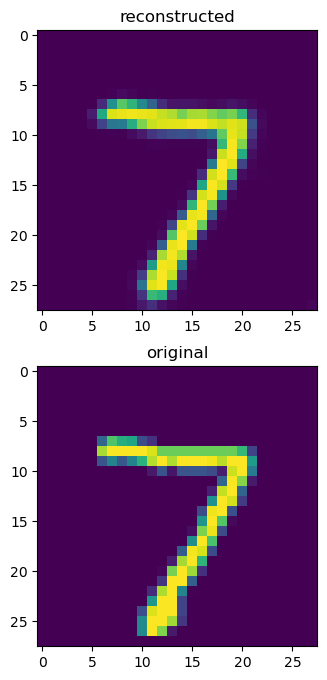

In [33]:
plt.figure(figsize=(20, 8))
cx = plt.subplot(2, 1, 1) 
plt.title("reconstructed") 
plt.imshow(tf.squeeze(decoded_image[0])) 
ax = plt.subplot(2,1,2) 
plt.title("original") 
plt.imshow(tf.squeeze(X_test[0])) 

In [34]:
encoded_image=model.encoder(X_test).numpy()
decoded_image=model.decoder(encoded_image)

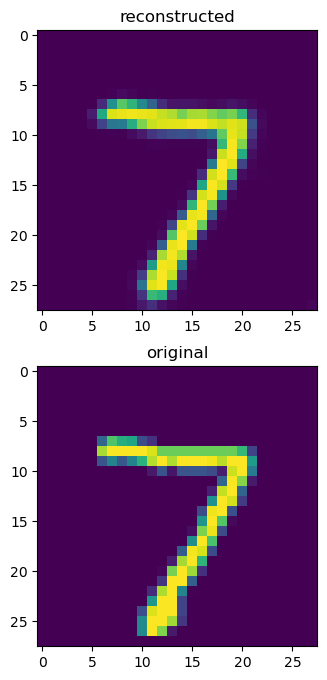

In [35]:
plt.figure(figsize=(20, 8))
cx = plt.subplot(2, 1, 1) 
plt.title("reconstructed") 
plt.imshow(tf.squeeze(decoded_image[0])) 
ax = plt.subplot(2, 1, 2) 
plt.title("original") 
plt.imshow(tf.squeeze(X_test[0])) 